# Using SAS DLPy to Define and Convert Keras Models

You can use SAS DLPy API to download and import a wide variety of pre-trained deep learning models. Access to a collection of pre-trained deep learning models is a good thing: pre-trained deep neural networks represent significant savings in compute and development time, and enhance developer productivity. 

Numerous Keras model libraries exist on the web (https://github.com/fchollet/keras-resources).

The following example code uses SAS DLPy to create a Keras model to classify gray-scale images of handwritten numeric digits from the MNIST database. 

After creating the Keras MNIST image classification model, the example code uses DLPy utilities to convert the Keras model `model0` into a regular DLPy model `model1`.

This example assumes that you have the SAS DLPy API installed, and have an active SAS CAS server.

In [10]:
%matplotlib inline

### Configure CAS and Import SWAT

The following code configures your CAS session for deep learning tasks. 

First, import SWAT. SWAT is a Python interface to SAS CAS that enables you to load data into memory and apply CAS actions to the data.

<b>Note:</b> For more information about starting a CAS session with the SWAT package, see https://sassoftware.github.io/python-swat/getting-started.html.

In [11]:
import swat
sess = swat.CAS(cashost, casport)

### Define a MNIST Classification Model in Keras

The following example creates a Keras model that performs a MNIST classification task by identifying handwritten digits. The MNIST (Modified National Institute of Standards and Technology) database consists of images of handwritten digits. The MNIST database is an open-source database that is used to train various machine learning models.

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from keras.models import Sequential
from keras.layers import *

Now use Keras `Sequential()` to create a CNN network designed to classify images of MNIST digits. 

Begin with the input layer. Use `add()` to specify a 2-D convolutional input layer that has 32 nodes, a kernel_size of (5, 5), and a stride of (1, 1). The Conv2-D layer uses the `relu` activation function. Image padding should be the `same` for top, right, bottom, and left sides of images. *Note:* The SAS DLPy API currently supports only `same` image padding. The Keras input shape defines the input image channels. This training data for this model consists of monochrome images (1 channel) that are 28 pixels tall and 28 pixels wide. Keras defines this input shape as (28, 28, 1). The 2-D convolutional input layer is paired with a 2-D max pooling layer of size (2, 2), and stride of (2, 2). The max pooling layer also utilizes `same` image padding. Then the convolution and pooling combo is repeated (more filters in the second pair). After the convolution and pooling layers, two dense layer is added; one with 1,000 neurons and the last one with 10 which is the total number of classes in the dataset.

The Keras code to create a sequential CNN model named `model0` with the architecture described above should resemble the following:

In [13]:
model0 = Sequential()
model0.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',padding='same',
                 input_shape=(28,28,1)))
model0.add(MaxPooling2D(pool_size=(2, 2), padding='same', strides=(2, 2)))
model0.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model0.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model0.add(Flatten())
model0.add(Dense(1000, activation='relu'))
model0.add(Dense(10, activation='softmax'))

Use `summary()` to generate a table that describes the model layer types, output shapes, and number of parameters in `model0`: 

In [14]:
model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              3137000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10010     
Total para

The Keras model `model0` has 7 layers and approximately 3.2 million parameters.



### Convert Keras Model to DLPy Model

Now convert the Keras model to a SAS DLPy model. Converting from a Keras model to a DLPy model enables all of the related DLPy deep learning model functions. Begin by importing the DLPy model class:

In [15]:
from dlpy import Model

Now create the DLPy model `model1` using `from_keras_model()` using Keras `model0`. The name assigned to the output_model_table variable is `converted_keras_model`.

In [16]:
model1 = Model.from_keras_model(conn=sess, keras_model=model0, output_model_table='converted_keras_model')

NOTE: Added action set 'deeplearn'.
NOTE: Model table is attached successfully!
NOTE: Model is named to "converted_keras_model" according to the model name in the table.


The DLPy model `model1` has been created from the Keras model `model0`. Now the DLPy model named `model1` can be used with all DLPy functions.

Use `print_summary()` to generate a table that shows model architecture by layer type, kernel size, stride, activation function, output size, and number of parameters: 

In [17]:
model1.print_summary()

,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,conv2d_3_input,input,None,None,None,"(28, 28, 1)","(0, 0)"
1,conv2d_3,convo,"(5, 5)",1,Rectifier,"(28, 28, 32)","(800, 32)"
2,max_pooling2d_3,pool,"(2, 2)",2,Max,"(14, 14, 32)","(0, 0)"
3,conv2d_4,convo,"(5, 5)",1,Rectifier,"(14, 14, 64)","(51200, 64)"
4,max_pooling2d_4,pool,"(2, 2)",2,Max,"(7, 7, 64)","(0, 0)"
5,dense_3,fc,"(3136, 1000)",None,Rectifier,1000,"(3136000, 1000)"
6,dense_4,output,"(1000, 10)",None,Softmax,10,"(10000, 10)"
7,,,,,,,3199106


Like the Keras model `model0`, the DLPy model `model1` contains the same number and sequence of layers, the same output layer shapes, and contains the same number (~3.2 million) of parameters. 

Use `plot_network()` to visualize a DAG diagram of the DLPy `model1` network made by converting the Keras `model0` network.

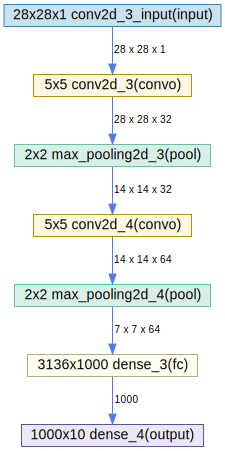

In [18]:
model1.plot_network()